In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("QVI_data.csv")
df.head(5)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
df.PROD_NBR

0           5
1          58
2          52
3         106
4          96
         ... 
264829     24
264830     60
264831     70
264832     65
264833     16
Name: PROD_NBR, Length: 264834, dtype: int64

In [4]:
df.columns = df.columns.str.lower().str.strip()   # df columns header in lower letters without spaces.

In [5]:
df.isna().sum()
df.duplicated().sum() , df.drop_duplicates(inplace=True)

(1, None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264833 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   lylty_card_nbr    264833 non-null  int64  
 1   date              264833 non-null  object 
 2   store_nbr         264833 non-null  int64  
 3   txn_id            264833 non-null  int64  
 4   prod_nbr          264833 non-null  int64  
 5   prod_name         264833 non-null  object 
 6   prod_qty          264833 non-null  int64  
 7   tot_sales         264833 non-null  float64
 8   pack_size         264833 non-null  int64  
 9   brand             264833 non-null  object 
 10  lifestage         264833 non-null  object 
 11  premium_customer  264833 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 26.3+ MB


In [7]:
df.date = pd.to_datetime(df.date)      # change col type to date type.
df[["lylty_card_nbr" , "store_nbr" , "prod_nbr" , "pack_size" ,"txn_id"]] =df[
    ["lylty_card_nbr" , "store_nbr" , "prod_nbr" , "pack_size" , "txn_id"]].astype(str)  # change cols type to obj

In [8]:
df.sample(5)

,lylty_card_nbr,date,store_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand,lifestage,premium_customer
69606,72109,2019-06-29,72,71056,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2,300,OLD,RETIREES,Mainstream
68426,71143,2018-09-18,71,69854,17,Kettle Sensations BBQ&Maple 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Mainstream
209455,214166,2019-05-29,214,213765,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70,INFUZIONS,MIDAGE SINGLES/COUPLES,Budget
196902,201237,2018-08-05,201,200968,74,Tostitos Splash Of Lime 175g,2,8.8,175,TOSTITOS,YOUNG SINGLES/COUPLES,Mainstream
2672,4021,2019-01-16,4,2733,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150,DORITOS,OLDER SINGLES/COUPLES,Premium


<p>&nbsp;</p>
<hr /><hr /><hr />
<h1 style="text-align: center;"><span style="text-decoration: underline;">Sales Analysis</span></h1>

In [9]:
print(">> KPIs:- ")
print(f"Customers Number is {df.lylty_card_nbr.nunique()}")
print("_____________________________________________________")
print(f"Customer lifestages Number is {df.lifestage.nunique()}")
print("_____________________________________________________")
print(f"Stores Number is {df.store_nbr.nunique()}")
print("_____________________________________________________")
print(f"Orders Number is {df.txn_id.nunique()}")
print("_____________________________________________________")
print(f"Products Number is {df.prod_nbr.nunique()}")
print("_____________________________________________________")
print(f"brands Number is {df.brand.nunique()}")
print("_____________________________________________________")          # check all KPIs values

>> KPIs:- 
Customers Number is 72636
_____________________________________________________
Customer lifestages Number is 7
_____________________________________________________
Stores Number is 272
_____________________________________________________
Orders Number is 263125
_____________________________________________________
Products Number is 114
_____________________________________________________
brands Number is 21
_____________________________________________________


<h3 style="text-align: center;">----<span style="color: #00ff00;"><span style="color: #99cc00;">Highest</span></span> and <span style="color: #ff0000;">Lowest </span>20 Products by Revenue----</h3>

In [10]:
products = df.groupby("prod_name", as_index=False)["tot_sales"].sum()
display(px.bar(products.sort_values(by="tot_sales" ,ascending=False).head(20),
                x="prod_name", y="tot_sales", text_auto=True, title="Top 20 Product by Revenue").update_layout(title_x=0.5))
display(px.bar(products.sort_values(by="tot_sales" ,ascending=True).head(20),
                x="prod_name", y="tot_sales", text_auto=True, title="Lowest 20 Product by Revenue").update_layout(title_x=0.5))

<div>
<ul>
<li>
<h3>Doritos Corn Chips Supreme 380G is the most profitable product, with total revenue of approximately $39K, followed by Smith Crinkle Chips Original 380G, which has total revenue of around $36K.</h3>
</li>
<li>
<h3>Woolworths Medium Salsa 300G is the least profitable product, with total revenue of approximately $4,050, followed by Woolworths Mild Salsa 300G, which has total revenue of around $4,234</h3>
</li>
</ul>
</div>

<h3 style="text-align: center;">----<span style="color: #00ff00;"><span style="color: #99cc00;">Highest</span></span> and <span style="color: #ff0000;">Lowest </span>20 Stores by Revenue----</h3>

In [11]:
stores = df.groupby("store_nbr", as_index=False)["tot_sales"].sum()
display(px.bar(stores.sort_values(by="tot_sales", ascending=False).head(20), x="store_nbr" , y="tot_sales",text_auto=True, title="Top 20 Stores by Revenue").update_layout(title_x=0.5))
display(px.bar(stores.sort_values(by="tot_sales", ascending=True).head(20), x="store_nbr" , y="tot_sales",text_auto=True, title="Lowest 20 Stores by Revenue").update_layout(title_x=0.5))

<ul>
<li>
<h3>Store 226 is the most profitable, with total revenue of approximately $176K, followed by Store 88, which has total revenue of around $163K.</h3>
</li>
<li>
<h3>Store 211 is the least profitable, with total revenue of approximately $5.2, followed by Store 76, which has total revenue of around $6.</h3>
</li>
</ul>

<h2 style="text-align: center;"><span style="text-decoration: underline;"><strong>&diams;&nbsp;Trial and non-Trial stores&nbsp;&diams;</strong></span></h2>
<h3 style="text-align: center;">&loz; Trial Sotores are 77, 86 and 88&nbsp;&loz;</h3>

### Firstly i need to check the trial stores ranking with the non-trial stores by revenue amount during the trial period.

In [12]:
period = df[df.date.between("2019-02-01","2019-04-30")].reset_index(drop=True)  #  create a new df during the trial period only.
str_rev = period.groupby("store_nbr", as_index=False)["tot_sales"].sum().sort_values(
    by="tot_sales" ,ascending=False).reset_index(drop=True)  #  sort the stores according the total revenue into the trial period.
str_rev[str_rev["store_nbr"].isin(["77","86","88"])]   # check trial stores revenue rank only

,store_nbr,tot_sales
1,88,4286.8
63,86,2788.2
193,77,777.0


### So The Store No. 88 ranks 2nd by total revenues $4286, Store No. 86 ranks 64th by total revenues $2788, and Store No. 77 ranks 194th by $777 in total revenue during the trial period.

<div>
<h3 style="text-align: center;">&nbsp;</h3>
<hr />
<h2 style="text-align: center;">Create a new table for the <span style="text-decoration: underline;">Trial stores</span> ("77", "86" and "88") and another one for the <span style="text-decoration: underline;">non-Trial</span> stores between start of FEB 2019 till end of APR 2019</h2>
</div>

In [13]:
trial_stors = period[period["store_nbr"].isin(["77","86","88"])] 
non_trial_stors = period[~period["store_nbr"].isin(["77","86","88"])]
print(f" Revenue AVG for all Trials stores was ${round(trial_stors.tot_sales.mean(),2)
                                                } compared to ${
                                                    round(non_trial_stors.tot_sales.mean(),2)} for all Non-Trials stores, reflection a {
                                                        round((trial_stors.tot_sales.mean() - non_trial_stors.tot_sales.mean()) /
                                                               non_trial_stors.tot_sales.mean() *100 , 1)}% increase during the Trial period.")
                                  # compare betwwen trial stores revenue avg and non-trial stores revenue avg.

 Revenue AVG for all Trials stores was $7.54 compared to $7.36 for all Non-Trials stores, reflection a 2.4% increase during the Trial period.


<Axes: xlabel='date'>

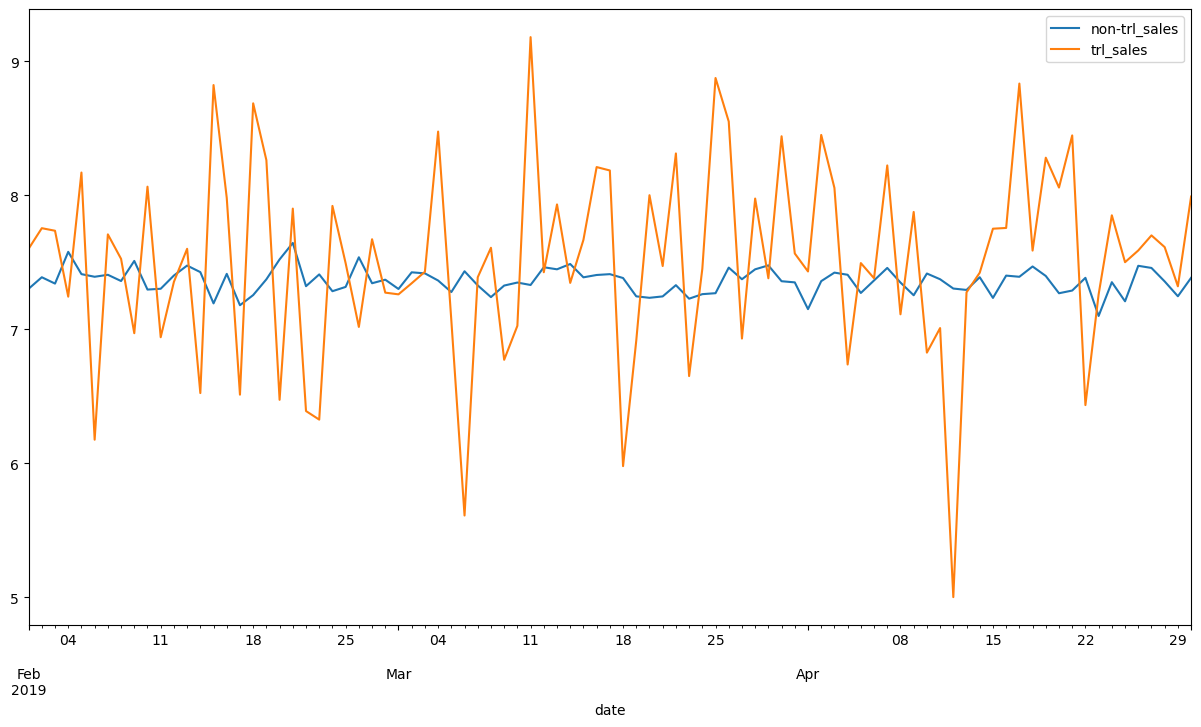

In [42]:
n = non_trial_stors.groupby("date",as_index=False)["tot_sales"].mean().set_index("date")
n["trl_sales"] = trial_stors.groupby("date",as_index=False)["tot_sales"].mean().set_index("date")["tot_sales"]
n.columns = ("non-trl_sales" , "trl_sales")
n.plot(figsize=(15,8))

In [14]:
grouping =trial_stors.groupby(["date","store_nbr"], as_index=False)[["lylty_card_nbr", "txn_id", "tot_sales" ]].agg(
    ["sum", "nunique"]).drop(
        columns=[('lylty_card_nbr','sum'),('txn_id', 'sum'),('tot_sales', 'nunique')])     #create a grouping for trial strores 
grouping.columns = [("date"),("store"),("cst_num"),("order_num"),("revenues")]  # change columns name
grouping = grouping.pivot(
    index="date",columns="store",values=["cst_num","order_num","revenues"])  # create a new pivot table with trial stores data as columns not rows.
grouping.columns = ("cst_num-77", "cst_num-86", "cst_num-88", "order_num-77", "order_num-86", "order_num-88", "revenues-77", "revenues-86", "revenues-88")
grouping = grouping.fillna(0)
grouping.head(5)

,cst_num-77,cst_num-86,cst_num-88,order_num-77,order_num-86,order_num-88,revenues-77,revenues-86,revenues-88
date,,,,,,,,,
2019-02-01,2.0,3.0,6.0,2.0,3.0,6.0,11.0,18.6,54.0
2019-02-02,2.0,3.0,8.0,2.0,3.0,8.0,8.4,22.6,69.8
2019-02-03,4.0,8.0,11.0,4.0,8.0,11.0,19.7,54.2,104.0
2019-02-04,1.0,2.0,4.0,1.0,2.0,4.0,2.3,18.4,30.0
2019-02-05,2.0,4.0,7.0,2.0,4.0,7.0,13.4,27.0,65.8


In [17]:
norm= grouping.rolling(20).mean()      # used rolling function to smoothing the fluctuations in the trend line.

display(px.line(data_frame=  norm , y=(["revenues-77" , "revenues-86" , "revenues-88"]),title="Revenues for each store during Trial Period"
                ).update_layout(title_x=0.5))
display(px.line(data_frame=  norm , y=(["cst_num-77" , "cst_num-86" , "cst_num-88"]),title="Customer Frequency for each store during Trial Period"
                ).update_layout(title_x=0.5))
display(px.line(data_frame=  norm , y=(["order_num-77" , "order_num-86" , "order_num-88"]),title="Orders No for each store during Trial Period"
                ).update_layout(title_x=0.5))

<ul>
<li style="text-align: left;">
<h3>As observed, Store No. 88 ranks first in total revenue, customer frequency, and order count, followed by Store No. 86. Store No. 77 ranks 3rd during the trial period.</h3>
<hr /><hr /><hr />
<h3>Regards,</h3>
<h3><span style="text-decoration: underline;">Mohamed&nbsp;Hamed</span>.</h3>
<hr />
<h3>&nbsp;</h3>
</li>
</ul>